In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
def generate_data(n_samples=20000, n_informative=5, n_classes=2, n_clusters_per_class=3, n_features=50, random_state=42):
  X,y = datasets.make_classification(n_samples=n_samples,
                                     n_informative=n_informative,
                                     n_classes=n_classes,
                                     n_clusters_per_class=n_clusters_per_class,
                                     n_features=n_features,
                                     random_state=random_state)
  df = pd.DataFrame(X, columns=['col_'+str(i) for i in range(n_features)])
  df['GoodCustomer'] = y
  return df

In [3]:
df = generate_data(n_samples=20000, n_informative=5, n_classes=2, n_clusters_per_class=3, n_features=50, random_state=42)

In [4]:
df.shape

(20000, 51)

In [5]:
# Removing duplicate rows if any
print('Shape before deleting duplicate values:', df.shape)
df.drop_duplicates(inplace=True)
print('Shape After deleting duplicate values:', df.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
df.head(10)

Shape before deleting duplicate values: (20000, 51)
Shape After deleting duplicate values: (20000, 51)


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,GoodCustomer
0,-0.088106,-0.314244,0.479559,2.203197,0.559660,-0.186362,1.385886,-0.683268,-0.341997,-0.754463,...,-1.102233,-0.284813,0.793082,-3.123545,0.087487,0.324474,0.202827,0.470958,-1.138130,1
1,1.311127,0.302814,1.438946,1.521785,-0.320724,1.047228,2.296687,-0.022670,-0.951992,0.167811,...,2.158395,1.955789,-0.003680,0.234569,1.101096,0.221934,0.818399,-0.409609,0.163475,0
2,-1.840876,-0.014660,0.792266,-1.443184,0.586755,0.700236,1.788254,0.817290,0.116972,0.224068,...,-0.652124,-1.619789,0.480149,-1.068155,0.321182,0.063506,0.780467,-0.069648,1.004818,0
3,-0.497252,0.033724,0.075520,0.187760,-0.923713,-1.186174,-0.110560,0.008392,-0.195797,0.738910,...,-2.235828,-0.016960,-0.638585,-0.189545,-0.314387,0.520251,0.504166,2.613872,-0.421030,0
4,0.544392,-1.367799,-0.792835,-1.410303,-0.397595,1.313621,-0.950171,1.282633,-1.796645,0.432856,...,-0.025172,0.065277,-1.475451,-2.673422,-1.280470,0.124855,-1.680541,0.704404,-0.978382,0
5,1.336751,0.103212,-0.546918,2.644975,0.847590,0.280952,-0.172839,1.526550,-0.681288,-0.452934,...,2.067298,-1.419296,0.316949,-0.364000,-0.214452,0.369517,-0.636941,-1.875462,0.770887,1
6,-0.964480,0.978657,-0.719835,-1.409123,-0.469958,-0.291001,0.325195,-0.460501,-0.951673,-0.720930,...,0.186292,-1.155951,-0.553773,-0.457003,0.226059,-0.990997,-1.099149,0.318777,2.378505,0
7,-0.432668,1.259131,0.910166,0.546777,1.167527,-0.204754,0.134436,0.316685,-0.512903,-0.365573,...,0.479506,1.006691,-1.313328,-0.234469,-0.078530,-0.277792,-0.332863,0.121830,1.242055,1
8,-0.808245,-1.172959,1.104733,-0.031824,-0.633510,-0.219880,-1.270468,0.200025,-0.852024,-0.778628,...,-2.531286,-0.986185,-0.444016,0.951128,0.251750,-0.828511,-1.161703,0.380349,0.085452,0
9,1.131938,-1.636722,-0.562743,2.589360,-1.180252,1.158508,-2.078094,-0.025323,0.088914,-0.529229,...,-4.707752,-0.825732,-0.015286,1.233796,1.168627,-0.149122,-0.058531,-0.164237,-0.148711,1


# **Définition de l’énoncé du problème**
Créer un modèle prédictif capable de dire si une personne est un bon client ou non

Prédicteurs :  'col_0', 'col_1', 'col_2', 'col_3',.... 'col_30'.

Variable cible : `GoodCustomer`

- `GoodCustomer`=0 Le client n'est pas un bon client ( client douteux)

- `GoodCustomer`=1  Le client est bon ( client fidèle)

In [6]:
df['GoodCustomer'].unique()

array([1, 0])

# **Détermination du type d'apprentissage automatique**
Sur la base de l’énoncé du problème, nous pouvons comprendre que nous devons créer un modèle de classification ML supervisé, car la variable cible est catégorielle.

# **Regardons la distribution de la variable cible**
- Si la distribution de la variable cible est trop asymétrique, la modélisation prédictive ne sera pas possible.
- Une courbe en cloche est souhaitable, mais une inclinaison légèrement positive ou négative sera également acceptable.

<Axes: xlabel='GoodCustomer'>

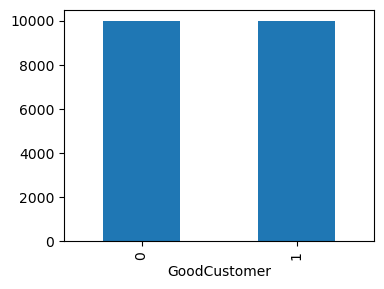

In [7]:
%matplotlib inline
# Création d'un graphique à barres car la variable cible est catégorielle
GroupedData=df.groupby('GoodCustomer').size()
GroupedData.plot(kind='bar', figsize=(4,3))

✨✨ **Interprétation**

La distribution des données de la variable cible  `GoodCustomer` est satisfaisante pour poursuivre l'étude.

# **Exploration de données de base**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   col_0         20000 non-null  float64
 1   col_1         20000 non-null  float64
 2   col_2         20000 non-null  float64
 3   col_3         20000 non-null  float64
 4   col_4         20000 non-null  float64
 5   col_5         20000 non-null  float64
 6   col_6         20000 non-null  float64
 7   col_7         20000 non-null  float64
 8   col_8         20000 non-null  float64
 9   col_9         20000 non-null  float64
 10  col_10        20000 non-null  float64
 11  col_11        20000 non-null  float64
 12  col_12        20000 non-null  float64
 13  col_13        20000 non-null  float64
 14  col_14        20000 non-null  float64
 15  col_15        20000 non-null  float64
 16  col_16        20000 non-null  float64
 17  col_17        20000 non-null  float64
 18  col_18        20000 non-nu

In [9]:
df.describe(include='all')

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,GoodCustomer
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.002712,-0.003717,-0.009040,0.332809,0.007320,0.002056,-0.006974,0.003653,0.006634,-0.001831,...,-1.465115,0.000672,0.013684,-0.001461,-0.004592,-0.002400,-0.010153,-0.001315,-0.003278,0.500000
std,0.992569,0.994425,1.000895,1.595192,1.001207,1.005095,1.004695,0.998231,0.999246,1.005716,...,2.439195,0.997104,0.992751,1.006093,1.006907,0.997445,0.999678,1.000478,1.001813,0.500013
min,-4.358897,-4.185432,-3.846347,-5.449533,-4.242235,-3.681594,-4.386303,-3.709986,-3.920221,-3.886019,...,-15.707733,-3.656687,-4.025491,-3.934672,-4.095732,-4.301410,-4.078617,-3.904270,-3.741159,0.000000
25%,-0.673135,-0.677153,-0.685757,-0.744405,-0.659777,-0.676941,-0.684488,-0.674603,-0.671771,-0.683459,...,-2.977242,-0.671367,-0.656656,-0.676468,-0.682532,-0.677466,-0.702142,-0.673689,-0.680306,0.000000
50%,-0.009113,-0.006956,-0.014355,0.407817,-0.000996,-0.003136,-0.002138,0.005154,0.014847,-0.003593,...,-1.437783,-0.005311,0.019003,0.002075,-0.004270,-0.006441,-0.013666,-0.011524,-0.003972,0.500000
75%,0.666204,0.674603,0.668062,1.449202,0.680065,0.681070,0.672066,0.684936,0.687443,0.675609,...,0.152395,0.666263,0.684342,0.667495,0.673413,0.669496,0.666940,0.672384,0.675783,1.000000
max,3.827565,4.201662,4.155664,5.954594,3.873422,4.092950,4.293276,3.773985,4.332210,4.185208,...,9.643693,3.913604,3.572481,4.298278,4.227136,3.502351,4.242657,3.712399,3.656097,1.000000


array([[<Axes: title={'center': 'col_0'}>,
        <Axes: title={'center': 'col_1'}>],
       [<Axes: title={'center': 'col_2'}>,
        <Axes: title={'center': 'col_3'}>],
       [<Axes: title={'center': 'col_4'}>,
        <Axes: title={'center': 'col_5'}>]], dtype=object)

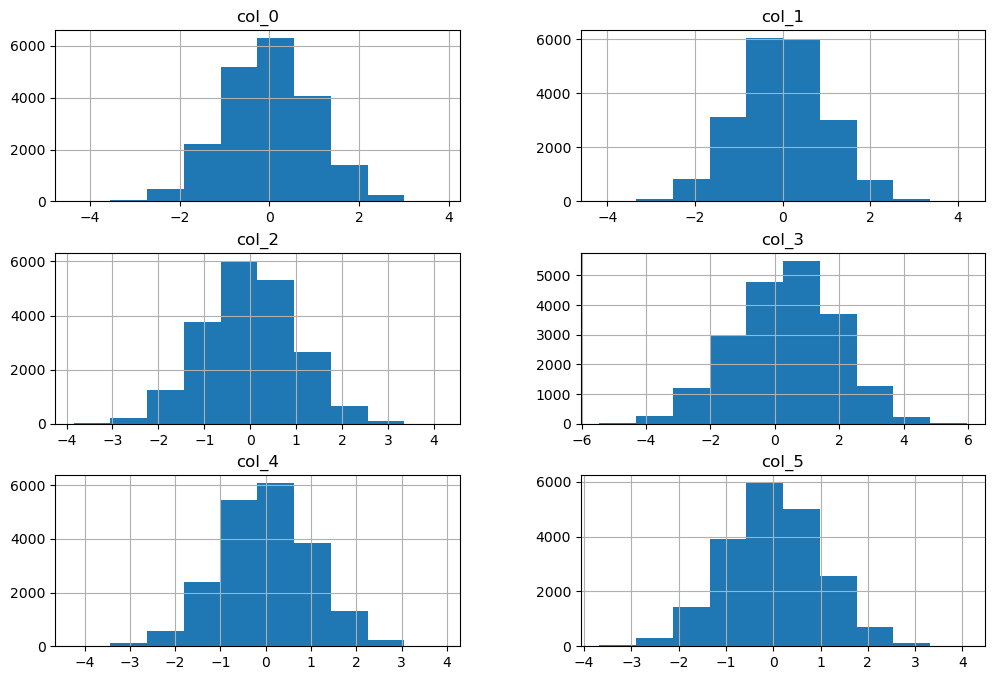

In [10]:
df.hist(['col_0', 'col_1', 'col_2','col_3','col_4','col_5'], figsize=(12,8))

array([[<Axes: title={'center': 'col_6'}>,
        <Axes: title={'center': 'col_7'}>],
       [<Axes: title={'center': 'col_8'}>,
        <Axes: title={'center': 'col_9'}>],
       [<Axes: title={'center': 'col_10'}>,
        <Axes: title={'center': 'col_11'}>]], dtype=object)

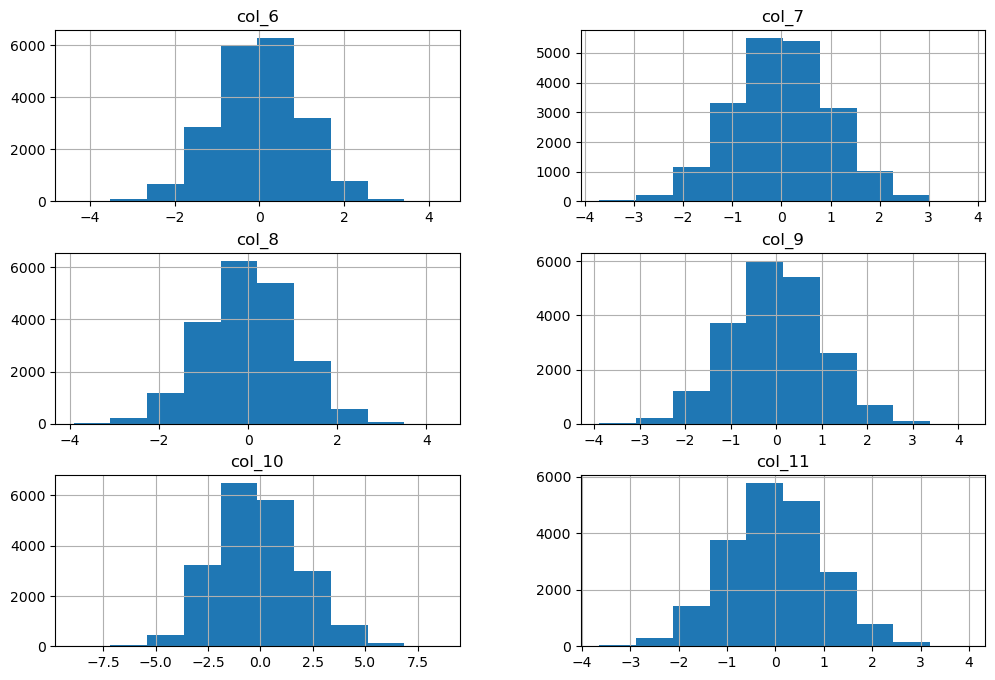

In [11]:
df.hist(['col_6', 'col_7', 'col_8','col_9','col_10','col_11'], figsize=(12,8))

✨✨ **Interprétation de l'histogramme**

Les histogrammes nous montrent la distribution des données pour une seule variable continue.

L'axe des X montre la plage de valeurs et l'axe des Y représente le nombre de valeurs dans cette plage.
Le résultat idéal pour un histogramme est une courbe en cloche ou une courbe en cloche légèrement inclinée.

- Dans notre cas, les distributions sont (ou presque) symétrique et en cloche.
Le dataset ne nécessite pas un traitement spécial avant la sélection des colonnes

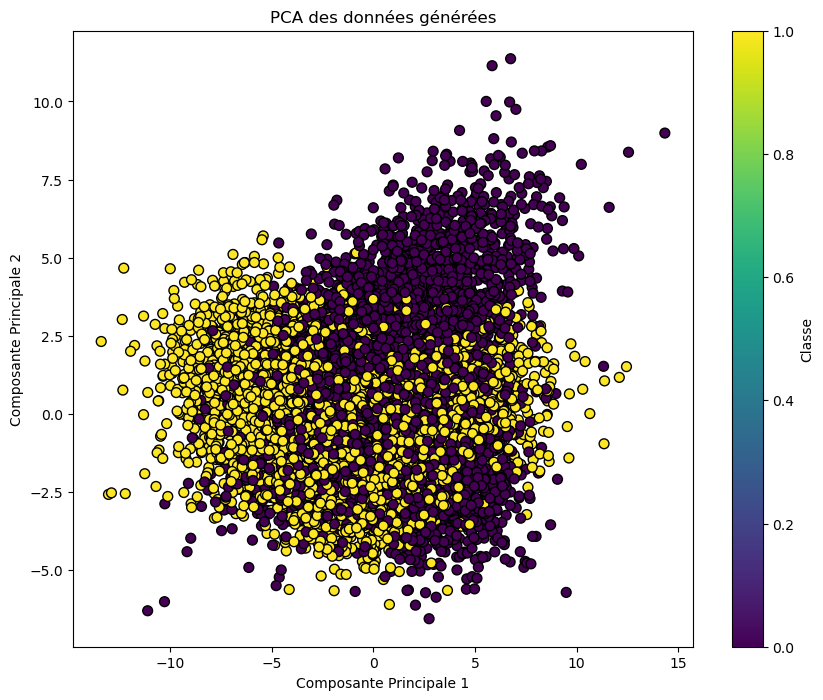

In [12]:
# Réduction de dimensions avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('GoodCustomer', axis=1))

# Visualisation des données
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['GoodCustomer'], cmap='viridis', edgecolor='k', s=50)
plt.title('PCA des données générées')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.colorbar(label='Classe')
plt.show()

# **Feature Selection**

Il est maintenant temps de choisir les meilleures colonnes (caractéristiques) qui sont corrélées à la variable cible. Cela peut être fait directement en mesurant les valeurs de corrélation ou en effectuant des tests ANOVA/Khi-carré. Cependant, il est toujours utile de visualiser la relation entre la variable cible et chacun des prédicteurs pour avoir une meilleure idée des données.

Dans cette étude de cas, la variable cible est catégorielle, par conséquent, les deux scénarios ci-dessous seront présents.

# Exploration visuelle de la relation entre les variables
- Variable cible catégorique VS prédicteur Continu ---- Box Plot

# Mesure statistique de relation entre les variables
- Variable cible catégorique VS prédicteur continu ---- Test ANOVA

In [13]:
# Box plots for Categorical Target Variable "GoodCustomer" and continuous predictors
def plot_box(df, ContinuousColsList):
  fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

  # Creating box plots for each continuous predictor against the Target Variable "GoodCustomer"
  for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
      df.boxplot(column=PredictorCol, by='GoodCustomer', figsize=(5,5), vert=True, ax=PlotCanvas[i])

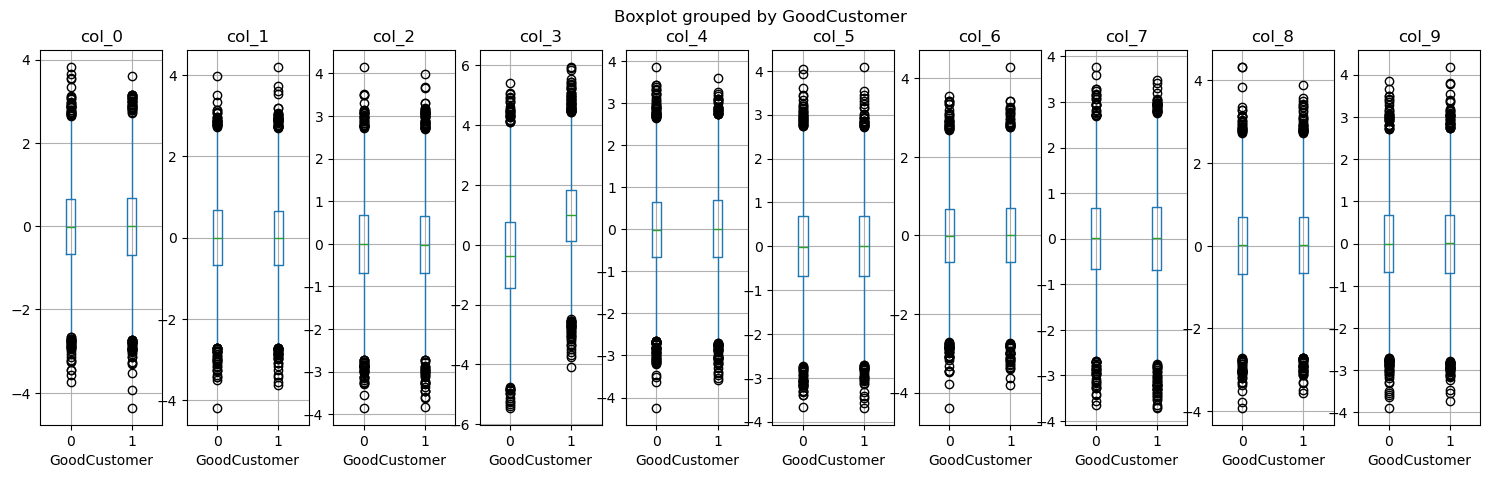

In [14]:
ContinuousColsList=['col_'+str(i) for i in range(10)]
plot_box(df, ContinuousColsList)

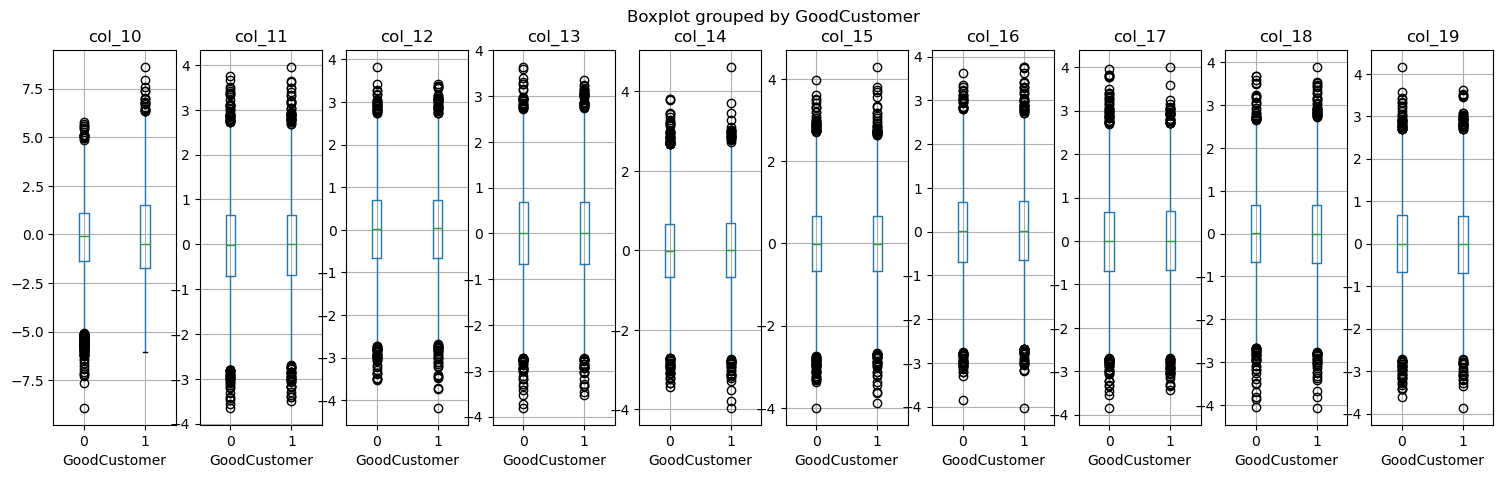

In [15]:
ContinuousColsList=['col_'+str(i) for i in range(10,20)]
plot_box(df, ContinuousColsList)

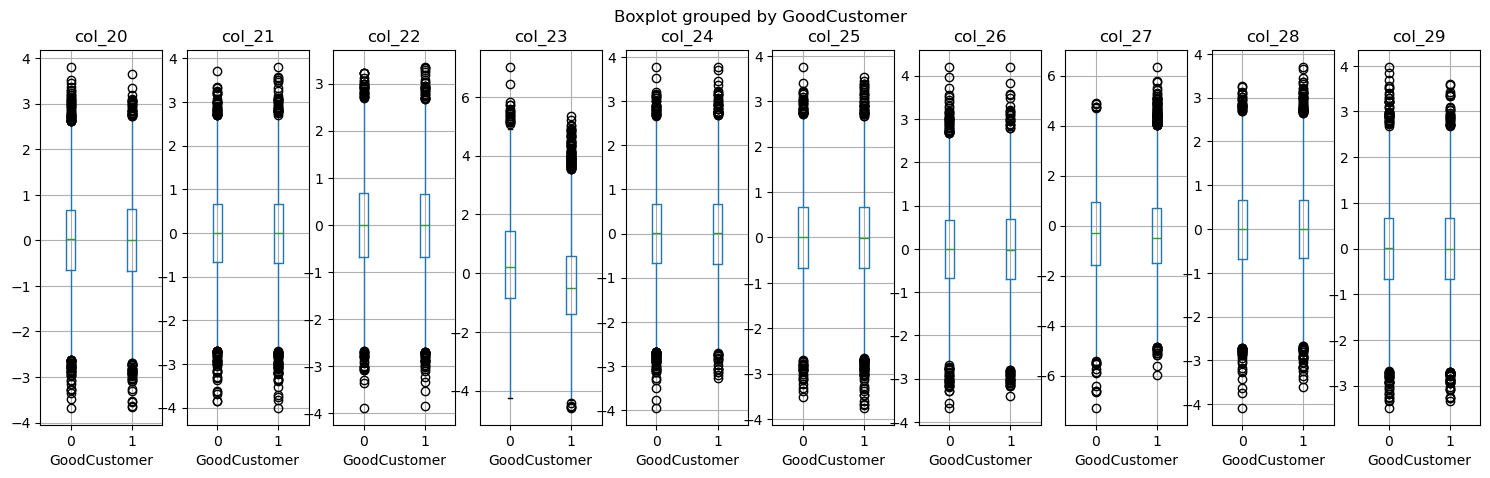

In [16]:
ContinuousColsList=['col_'+str(i) for i in range(20,30)]
plot_box(df, ContinuousColsList)

In [17]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.1, that means we reject H0
        if (AnovaResults[1] < 0.15):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [18]:
ContinuousVariables=['col_'+str(i) for i in range(50)]
SelectedPredictors = FunctionAnova(inpData=df, TargetVariable='GoodCustomer', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

col_0 is NOT correlated with GoodCustomer | P-Value: 0.9353731756496283
col_1 is NOT correlated with GoodCustomer | P-Value: 0.9045116639888532
col_2 is NOT correlated with GoodCustomer | P-Value: 0.8364927727266142
col_3 is correlated with GoodCustomer | P-Value: 0.0
col_4 is NOT correlated with GoodCustomer | P-Value: 0.43836260535256166
col_5 is NOT correlated with GoodCustomer | P-Value: 0.773875547653077
col_6 is NOT correlated with GoodCustomer | P-Value: 0.22117359568936906
col_7 is NOT correlated with GoodCustomer | P-Value: 0.8511642143478992
col_8 is NOT correlated with GoodCustomer | P-Value: 0.46184023535871943
col_9 is NOT correlated with GoodCustomer | P-Value: 0.30579549321988186
col_10 is correlated with GoodCustomer | P-Value: 6.532758523482943e-13
col_11 is NOT correlated with GoodCustomer | P-Value: 0.8058541394198142
col_12 is NOT correlated with GoodCustomer | P-Value: 0.23208285236740642
col_13 is NOT correlated with GoodCustomer | P-Va

In [19]:
SelectedPredictors

['col_3',
 'col_10',
 'col_14',
 'col_23',
 'col_34',
 'col_35',
 'col_37',
 'col_39',
 'col_40',
 'col_41',
 'col_43',
 'col_44',
 'col_49']

In [20]:
len(SelectedPredictors)

13

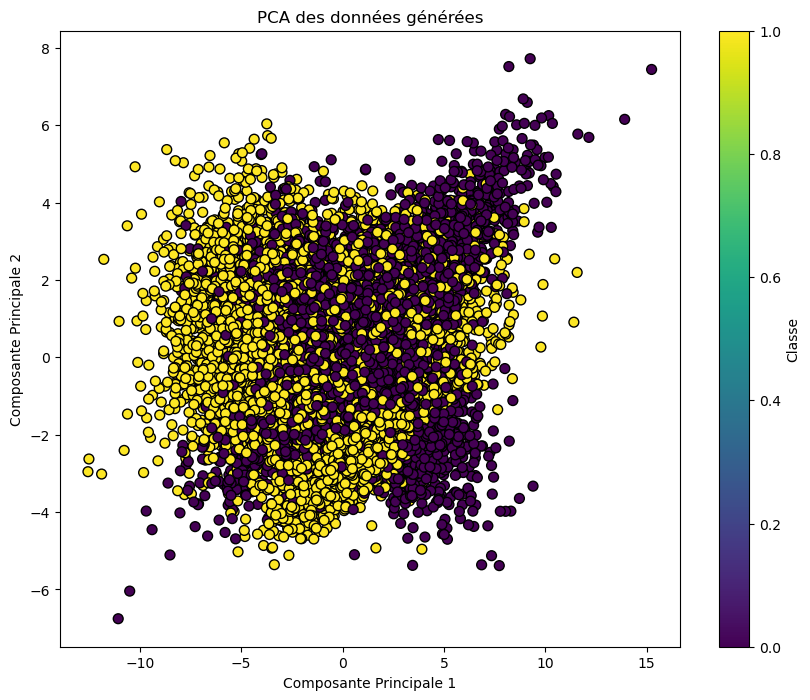

In [21]:
# Réduction de dimensions avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[SelectedPredictors])

# Visualisation des données
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['GoodCustomer'], cmap='viridis', edgecolor='k', s=50)
plt.title('PCA des données générées')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.colorbar(label='Classe')
plt.show()

In [22]:
df[SelectedPredictors].to_csv("./globaldata.csv", index=False)